# Unemployment Analysis in India During the COVID-19 Pandemic

Unemployment is typically assessed by the unemployment rate, representing the proportion of individuals without work within the total labor force.

The COVID-19 pandemic led to a significant surge in unemployment rates across India, reflecting the widespread economic disruption caused by the crisis.

This notebook aims to systematically analyze unemployment trends in India using Python, providing insights into the pandemic's impact on the workforce.

## 🔹# Goal
This analysis aims to assess the broad impacts of the COVID-19 pandemic on employment patterns across India.

The dataset enables a detailed exploration of how unemployment rates have changed among various states, using key indicators such as state-wise data, time series, measurement frequency, estimated unemployment rate, number of employed individuals, and labour participation rate.

# Dataset Overview
This dataset offers a detailed perspective on unemployment trends across Indian states during the COVID-19 pandemic.

- **States:** Includes data from multiple regions across India.
- **Date:** Captures the specific dates when unemployment rates were recorded.
- **Frequency:** Measurements are collected monthly.
- **Estimated Unemployment Rate (%):** Percentage of the labor force that is unemployed in each state.
- **Estimated Employed Individuals:** Number of people currently employed.
- **Estimated Labour Participation Rate (%):** Share of the working-age population (16-64 years) that is either employed or actively seeking work.

By tracking these indicators, the dataset enables a comprehensive analysis of how unemployment, employment, and labor participation rates have shifted across regions and over time. It is a key resource for understanding the socio-economic impact of the pandemic on India's workforce.

## 🔹# 1. Load the Urban Dataset

In [1]:
# --- Explication de cette cellule ---
import pandas as pd
import plotly.graph_objects as go

# Replace 'file_path.csv' with the actual path to your dataset
data = pd.read_csv('C:\\Users\\Bilal\\Desktop\\CodeAlphaProjects\\CodeAlpha_UnemploymentAnalysiswithPython\\Unemployment in India.csv')

# Preview the first few rows
data.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Dataset Overview
This dataset provides a comprehensive view of unemployment trends across Indian states during the COVID-19 pandemic.

- **States:** Covers multiple regions across India.
- **Date:** Records the specific dates when unemployment rates were measured.
- **Frequency:** Data collected at regular monthly intervals.
- **Estimated Unemployment Rate (%):** Percentage of the labor force that is unemployed in each state.
- **Estimated Employed Individuals:** Number of people currently employed.
- **Estimated Labour Participation Rate (%):** Proportion of the working-age population (16-64 years) either employed or actively seeking employment.

By capturing these key indicators, the dataset enables a detailed analysis of how unemployment, employment, and labor participation rates varied across regions and over time. It is a valuable resource for understanding the socio-economic impact of the pandemic on India's workforce.

In [2]:
# --- Explication de cette cellule ---
# Supprime les espaces et uniformise les noms
data.columns = data.columns.str.strip().str.lower()

In [3]:
# --- Explication de cette cellule ---
data.shape

(768, 7)

In [4]:
# --- Explication de cette cellule ---
data.describe()

,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
# --- Explication de cette cellule ---
data.describe(include=object)

,region,date,frequency,area
count,740,740,740,740
unique,28,14,2,2
top,Andhra Pradesh,31-10-2019,Monthly,Urban
freq,28,55,381,381


In [6]:
# --- Explication de cette cellule ---
# Display the data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   region                                   740 non-null    object 
 1   date                                     740 non-null    object 
 2   frequency                                740 non-null    object 
 3   estimated unemployment rate (%)          740 non-null    float64
 4   estimated employed                       740 non-null    float64
 5   estimated labour participation rate (%)  740 non-null    float64
 6   area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
# --- Explication de cette cellule ---
pd.DataFrame(data.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])


,Unique Values Count
region,29
date,15
frequency,3
estimated unemployment rate (%),625
estimated employed,741
estimated labour participation rate (%),627
area,3


In [8]:
# --- Explication de cette cellule ---
data.isnull().sum() 

region                                     28
date                                       28
frequency                                  28
estimated unemployment rate (%)            28
estimated employed                         28
estimated labour participation rate (%)    28
area                                       28
dtype: int64

In [9]:
# --- Explication de cette cellule ---
# Handling missing values
data.dropna(inplace=True)

In [10]:
# --- Explication de cette cellule ---
data.isna().sum()

region                                     0
date                                       0
frequency                                  0
estimated unemployment rate (%)            0
estimated employed                         0
estimated labour participation rate (%)    0
area                                       0
dtype: int64

In [11]:
# --- Explication de cette cellule ---
data.head()

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [12]:
# --- Explication de cette cellule ---
data.dtypes

region                                      object
date                                        object
frequency                                   object
estimated unemployment rate (%)            float64
estimated employed                         float64
estimated labour participation rate (%)    float64
area                                        object
dtype: object

In [13]:
# --- Explication de cette cellule ---
print(data.columns)

Index(['region', 'date', 'frequency', 'estimated unemployment rate (%)',
       'estimated employed', 'estimated labour participation rate (%)',
       'area'],
      dtype='object')


In [14]:
# --- Explication de cette cellule ---
# Conversion de la colonne 'Date' en format datetime
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

data.dtypes


region                                             object
date                                       datetime64[ns]
frequency                                          object
estimated unemployment rate (%)                   float64
estimated employed                                float64
estimated labour participation rate (%)           float64
area                                               object
dtype: object

In [15]:
# --- Explication de cette cellule ---
data.head()

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [16]:
# --- Explication de cette cellule ---
data.duplicated().sum()

0

In [17]:
# --- Explication de cette cellule ---
data.isnull().sum()

region                                     0
date                                       0
frequency                                  0
estimated unemployment rate (%)            0
estimated employed                         0
estimated labour participation rate (%)    0
area                                       0
dtype: int64

In [18]:
# --- Explication de cette cellule ---
# Remove leading/trailing spaces from the 'frequency' column
data['frequency'] = data['frequency'].str.strip()

In [19]:
# --- Explication de cette cellule ---
print(data['region'].value_counts())
print('-'*33)
print(data['date'].value_counts())
print('-'*33)
print(data['frequency'].value_counts())
print('-'*33)
print(data['area'].value_counts())

region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64
---------------------------------
date
2019-10-31    55
2019-11-30    55
2019-05-31    54
2019-06-30    54
2019-07-31    54
2019-08-31    53
2019-12-31    53
2020-01-31    53
2020-02-29    53
2019-09-30    52
2020-03-31    52
2020-04-30    51
2020-05-31    51
2020-06-30    50
Name: count, dtype: int64
--------------------

C:\Users\Bilal\AppData\Local\Temp\ipykernel_35872\582587753.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="region", y="estimated unemployment rate (%)", data=data, ci=None, palette="Set2")
C:\Users\Bilal\AppData\Local\Temp\ipykernel_35872\582587753.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="estimated unemployment rate (%)", data=data, ci=None, palette="Set2")


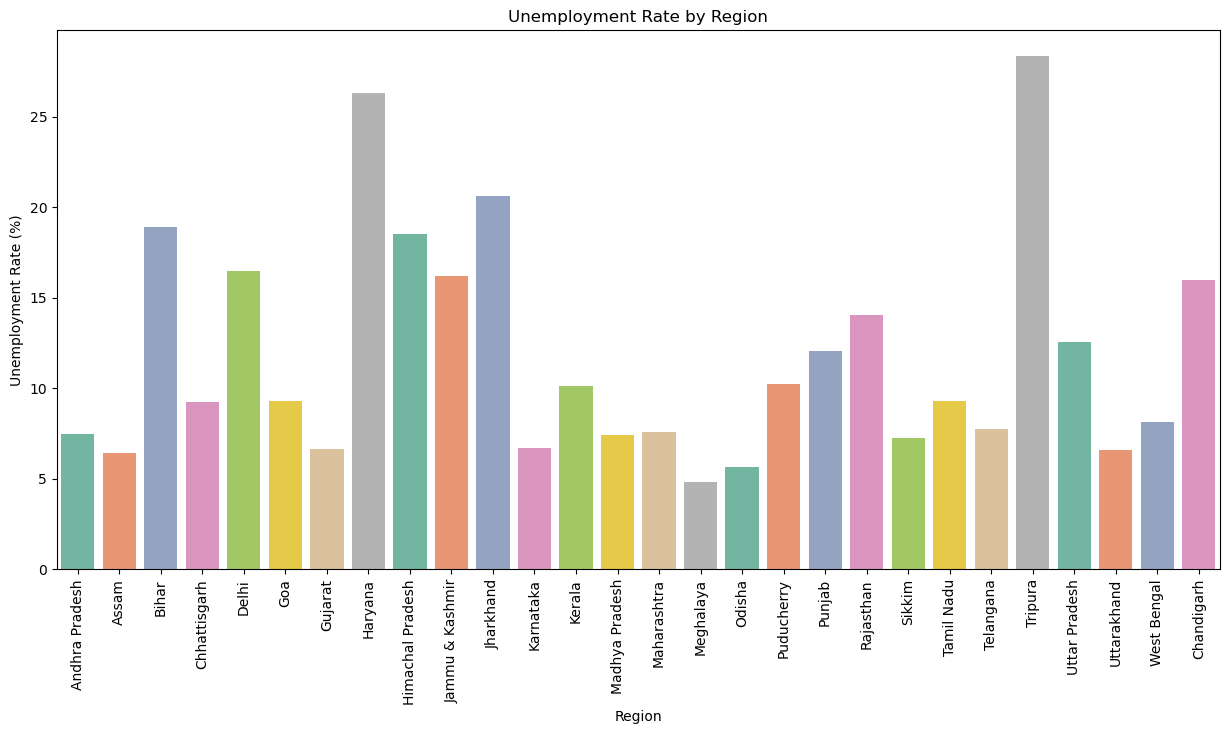

In [20]:
# --- Explication de cette cellule ---
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Unemployment Rate Distribution by Region
plt.figure(figsize=(15, 7))
sns.barplot(x="region", y="estimated unemployment rate (%)", data=data, ci=None, palette="Set2")
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region")
plt.show()

In [21]:
# --- Explication de cette cellule ---
#Average Metrics by Region
avg_metrics = data.groupby('region')[['estimated unemployment rate (%)', 'estimated labour participation rate (%)']].mean()
avg_metrics = avg_metrics.sort_values(by='estimated unemployment rate (%)', ascending=False)
avg_metrics

,estimated unemployment rate (%),estimated labour participation rate (%)
region,,
Tripura,28.350357,61.823929
Haryana,26.283214,42.737143
Jharkhand,20.585000,41.670714
Bihar,18.918214,38.153929
Himachal Pradesh,18.540357,44.222143
Delhi,16.495357,38.929643
Jammu & Kashmir,16.188571,41.030952
Chandigarh,15.991667,39.336667
Rajasthan,14.058214,39.973214


In [22]:
# --- Explication de cette cellule ---
state_avg = data.groupby('region')['estimated unemployment rate (%)'].mean().sort_values()

print("\n Top 5 States with Highest Unemployment:\n", state_avg.tail(5))
print("\n Top 5 States with Lowest Unemployment:\n", state_avg.head(5))


 Top 5 States with Highest Unemployment:
 region
Himachal Pradesh    18.540357
Bihar               18.918214
Jharkhand           20.585000
Haryana             26.283214
Tripura             28.350357
Name: estimated unemployment rate (%), dtype: float64

 Top 5 States with Lowest Unemployment:
 region
Meghalaya      4.798889
Odisha         5.657857
Assam          6.428077
Uttarakhand    6.582963
Gujarat        6.663929
Name: estimated unemployment rate (%), dtype: float64


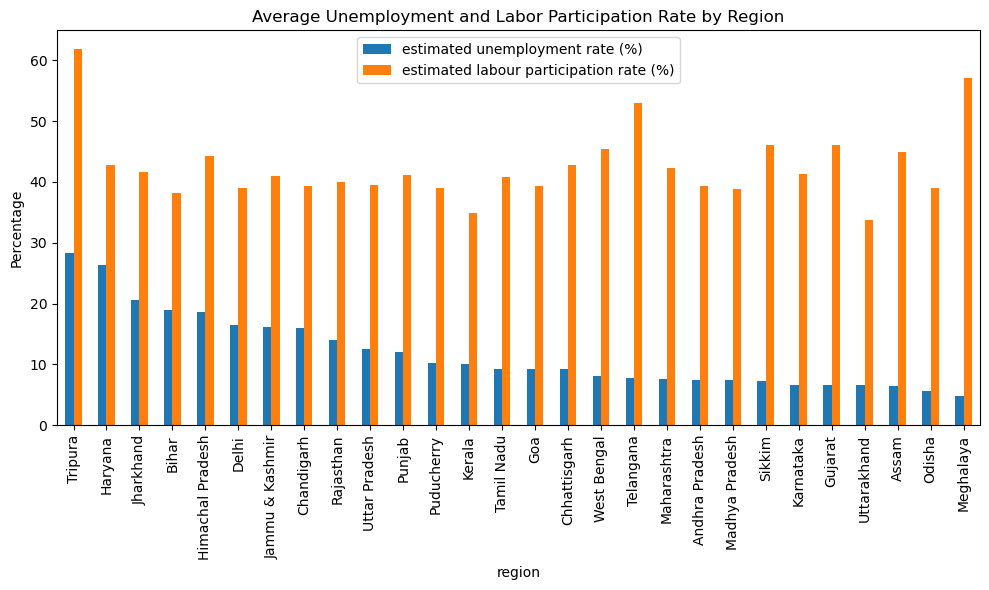

In [23]:
# --- Explication de cette cellule ---
# 3. Average Unemployment Rate Plot
avg_metrics.sort_values(by="estimated unemployment rate (%)", ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Average Unemployment and Labor Participation Rate by Region")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

C:\Users\Bilal\AppData\Local\Temp\ipykernel_35872\1624429864.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="area", data=data, palette="pastel")


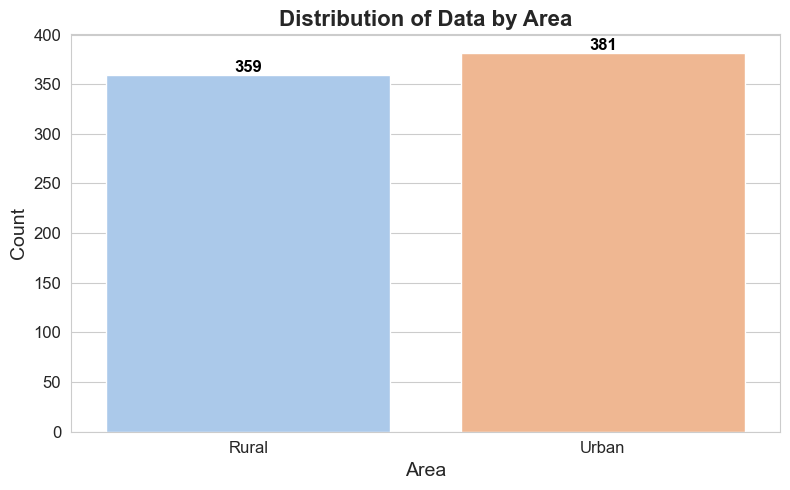

In [24]:
# --- Explication de cette cellule ---
# 4. Area-wise Data (Enhanced Visualization)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.countplot(x="area", data=data, palette="pastel")

# Add value annotations on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Distribution of Data by Area", fontsize=16, fontweight='bold')
plt.xlabel("Area", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

c:\Users\Bilal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Bilal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Bilal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Bilal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Bilal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Bilal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` va

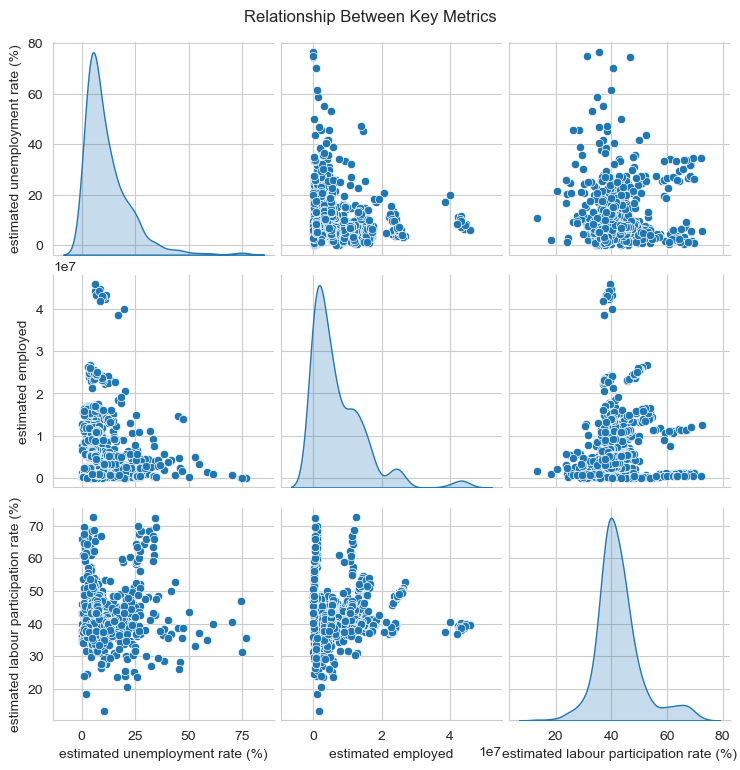

In [25]:
# --- Explication de cette cellule ---
# 5. Pair Plot for Key Metrics
pair_data = data[["estimated unemployment rate (%)", "estimated employed", "estimated labour participation rate (%)"]]
sns.pairplot(pair_data, diag_kind="kde", palette="husl", markers="o")
plt.suptitle("Relationship Between Key Metrics", y=1.02)
plt.show()

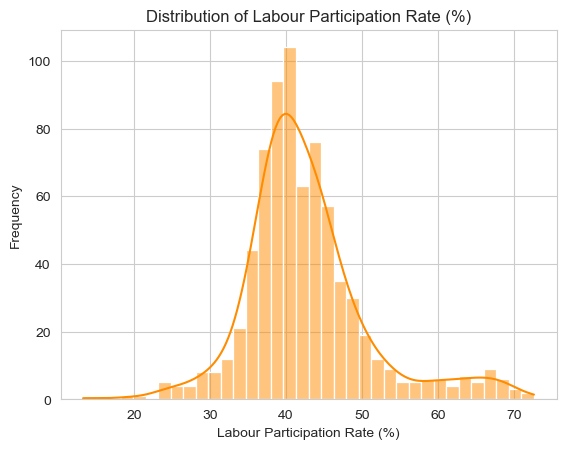

In [26]:
# --- Explication de cette cellule ---
# Histogram for Labour Participation Rate
sns.histplot(data=data, x="estimated labour participation rate (%)", kde=True, color="darkorange")
plt.title("Distribution of Labour Participation Rate (%)")
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Frequency")
plt.show()

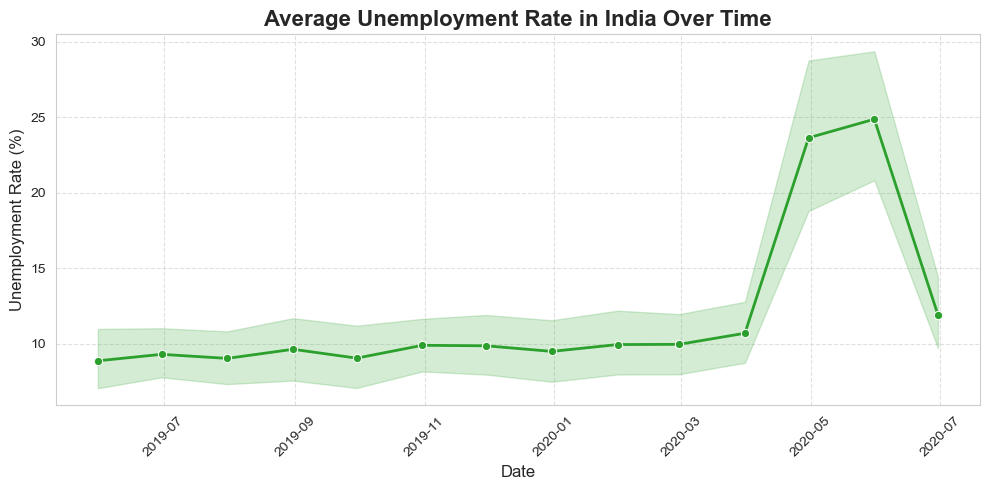

In [27]:
# --- Explication de cette cellule ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=data,
    x='date',
    y='estimated unemployment rate (%)',
    marker='o',
    color='#2ca02c',
    linewidth=2
)

plt.title('Average Unemployment Rate in India Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

A significant spike in the unemployment rate occurred in April and May 2020, which aligns with the nationwide lockdown in India during the COVID-19 pandemic. This sharp increase underscores the substantial economic disruption caused by the pandemic.

Prior to this period, the unemployment rate remained relatively low and stable, with only minor fluctuations.

In [28]:
# --- Explication de cette cellule ---
data['month'] = data['date'].dt.month
monthly_avg = data.groupby('month')['estimated unemployment rate (%)'].mean()

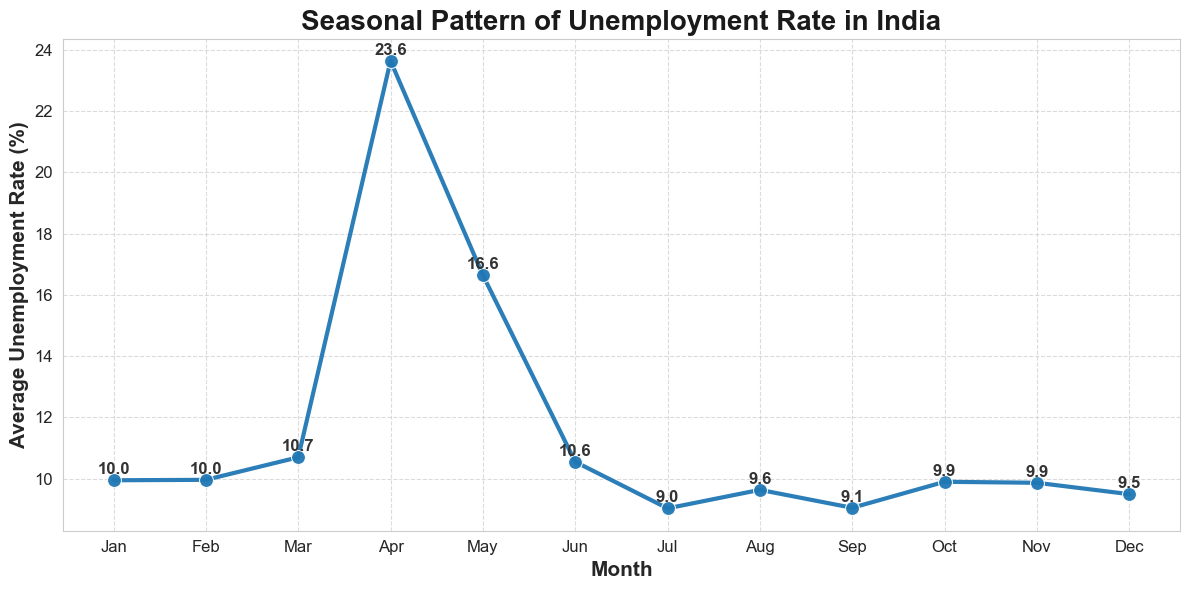

In [29]:
# --- Explication de cette cellule ---
# Enhanced Seasonal Pattern of Unemployment Rate in India
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Use a more vibrant color and larger markers
sns.lineplot(
    x=monthly_avg.index,
    y=monthly_avg.values,
    marker='o',
    markersize=10,
    linewidth=3,
    color="#1f77b4",
    alpha=0.95
)

# Add value annotations above each point
for i, val in enumerate(monthly_avg.values):
    plt.text(i+1, val+0.2, f"{val:.1f}", ha='center', fontsize=12, fontweight='bold', color='#333')

plt.title('Seasonal Pattern of Unemployment Rate in India', fontsize=20, fontweight='bold', color='#1a1a1a')
plt.xlabel('Month', fontsize=15, fontweight='bold')
plt.ylabel('Average Unemployment Rate (%)', fontsize=15, fontweight='bold')

months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), months_names, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The data reveals a pronounced seasonal trend in India's unemployment rate, with a sharp increase in April peaking at 23.6%. This surge may be attributed to factors such as the harvest season, the end of the academic year, or the onset of the COVID-19 pandemic.

Following this peak, the unemployment rate declines steadily, reaching a more stable level of around 9-10% during the latter half of the year.

In [30]:
# --- Explication de cette cellule ---
urban_avg = data[data['area'] == 'Urban'].groupby('month')['estimated unemployment rate (%)'].mean()
rural_avg = data[data['area'] == 'Rural'].groupby('month')['estimated unemployment rate (%)'].mean()

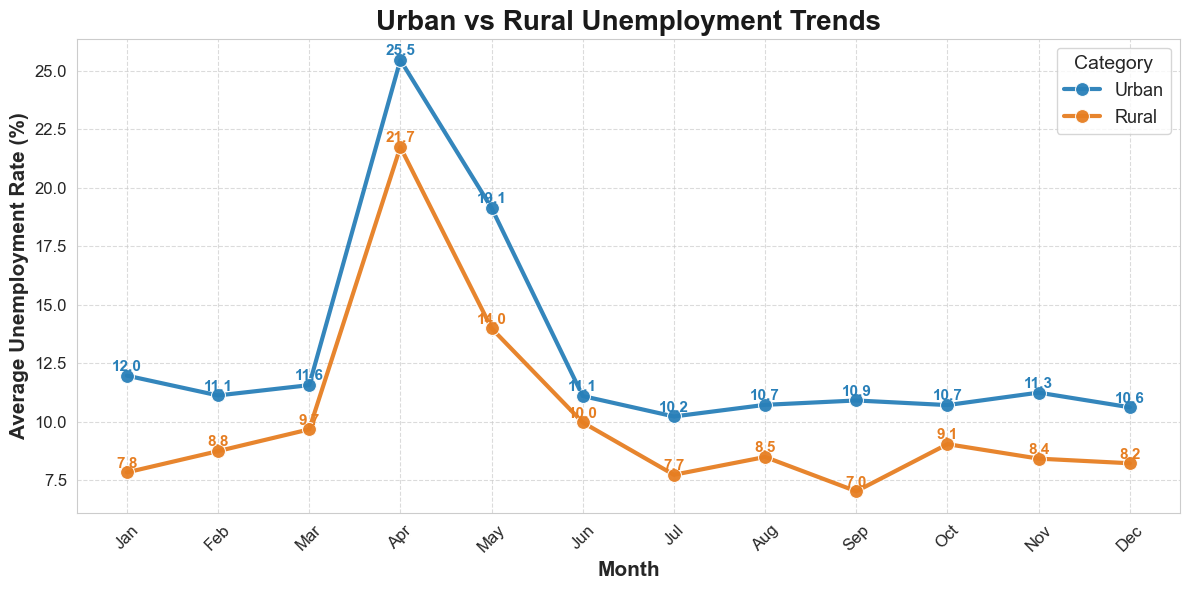

In [31]:
# --- Explication de cette cellule ---
df_plot = pd.DataFrame({
    'Month': urban_avg.index,
    'Average Rate (%)': urban_avg.values,
    'Category': 'Urban'
})
df_plot = pd.concat([df_plot, pd.DataFrame({
    'Month': rural_avg.index,
    'Average Rate (%)': rural_avg.values,
    'Category': 'Rural'
})])

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

palette = ["#2980b9", "#e67e22"]
ax = sns.lineplot(
    data=df_plot,
    x='Month',
    y='Average Rate (%)',
    hue='Category',
    marker='o',
    markersize=10,
    linewidth=3,
    palette=palette,
    alpha=0.95
)

plt.title('Urban vs Rural Unemployment Trends', fontsize=20, fontweight='bold', color='#1a1a1a')
plt.xlabel('Month', fontsize=15, fontweight='bold')
plt.ylabel('Average Unemployment Rate (%)', fontsize=15, fontweight='bold')
plt.legend(title='Category', fontsize=13, title_fontsize=14, loc='upper right')

months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), months_names, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for category in df_plot['Category'].unique():
    sub_df = df_plot[df_plot['Category'] == category]
    for i, val in enumerate(sub_df['Average Rate (%)']):
        plt.text(
            x=sub_df['Month'].iloc[i],
            y=val + 0.2,
            s=f"{val:.1f}",
            ha='center',
            fontsize=11,
            fontweight='bold',
            color=palette[0] if category == 'Urban' else palette[1]
        )

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Both urban and rural areas experienced their highest unemployment rates in April, with urban unemployment peaking at 25.5% and rural at 21.7%.

Throughout most of the year, urban unemployment remained higher than rural, with the most pronounced differences seen in April (25.5% vs. 21.7%) and May (19.1% vs. 14.0%).

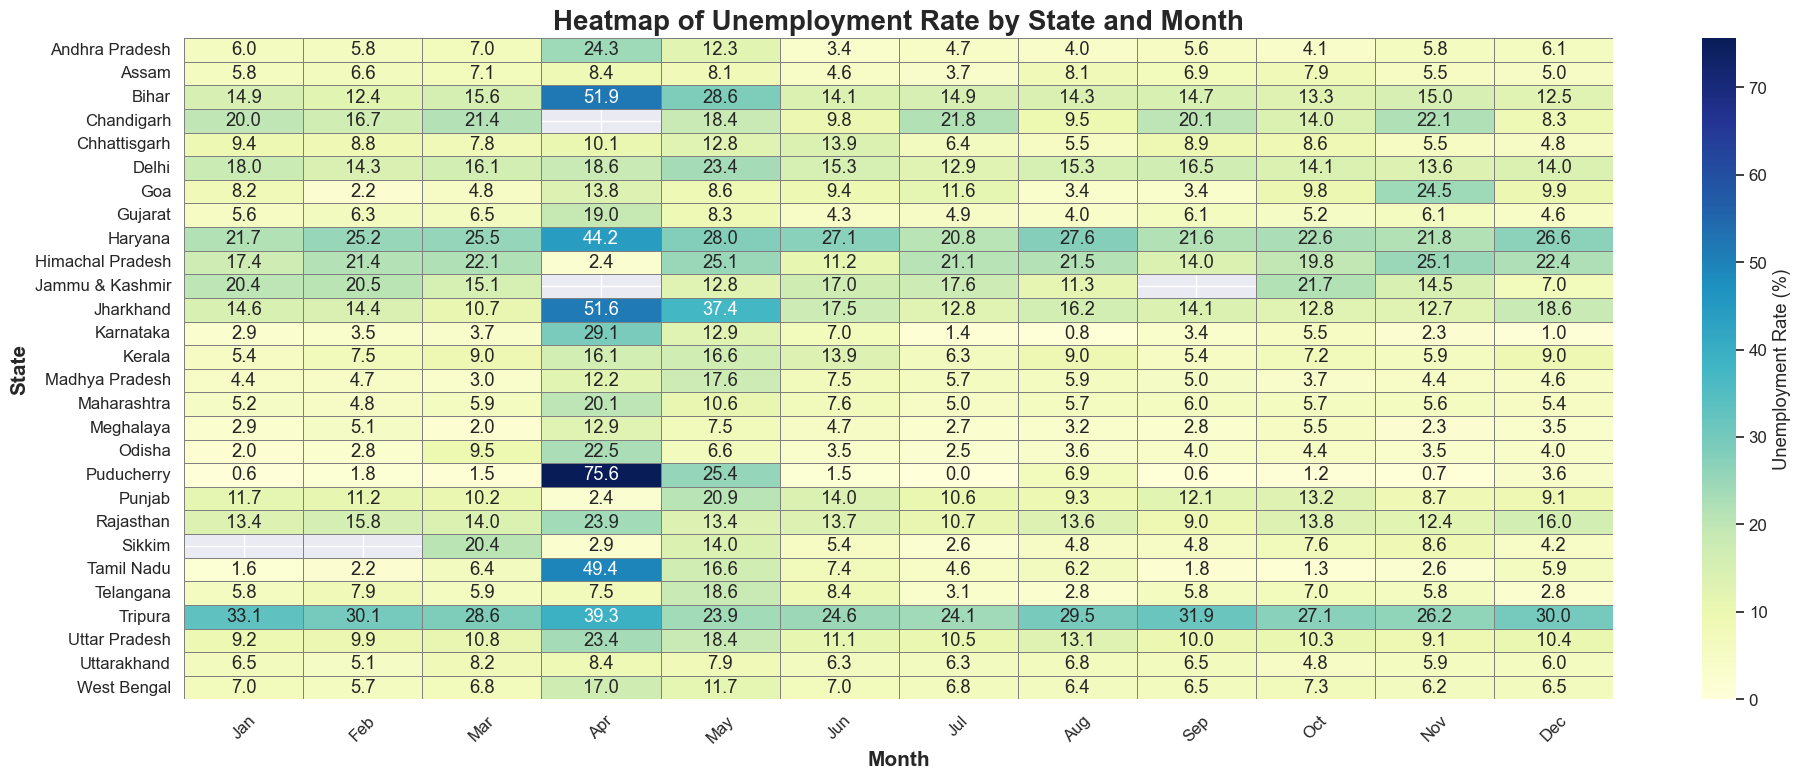

In [32]:
# --- Explication de cette cellule ---
# Heatmap of Unemployment Rate by State and Month (Improved)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use lowercase column names
heatmap_data = data.pivot_table(
    values='estimated unemployment rate (%)',
    index='region',
    columns='month'
)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

heatmap_data = heatmap_data.reindex(columns=range(1, 13))

plt.figure(figsize=(20, 8))
sns.set(font_scale=1.1)

sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt=".1f",
    linewidths=0.7,
    linecolor='gray',
    cbar_kws={'label': 'Unemployment Rate (%)'},
    square=False
)

plt.title('Heatmap of Unemployment Rate by State and Month', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=15, fontweight='bold')
plt.ylabel('State', fontsize=15, fontweight='bold')

plt.xticks(ticks=np.arange(0.5, 12.5), labels=month_names, rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

Haryana (26.4%) and Tripura (25.0%) have the highest unemployment rates, reflecting considerable challenges in their labor markets.

In contrast, Telangana (0.7%) and Meghalaya (2.0%) report the lowest unemployment rates, suggesting a stable and robust employment environment.

The wide range in unemployment rates—from 0.7% in Telangana to 26.4% in Haryana—underscores the significant regional disparities in economic conditions and job opportunities across India.

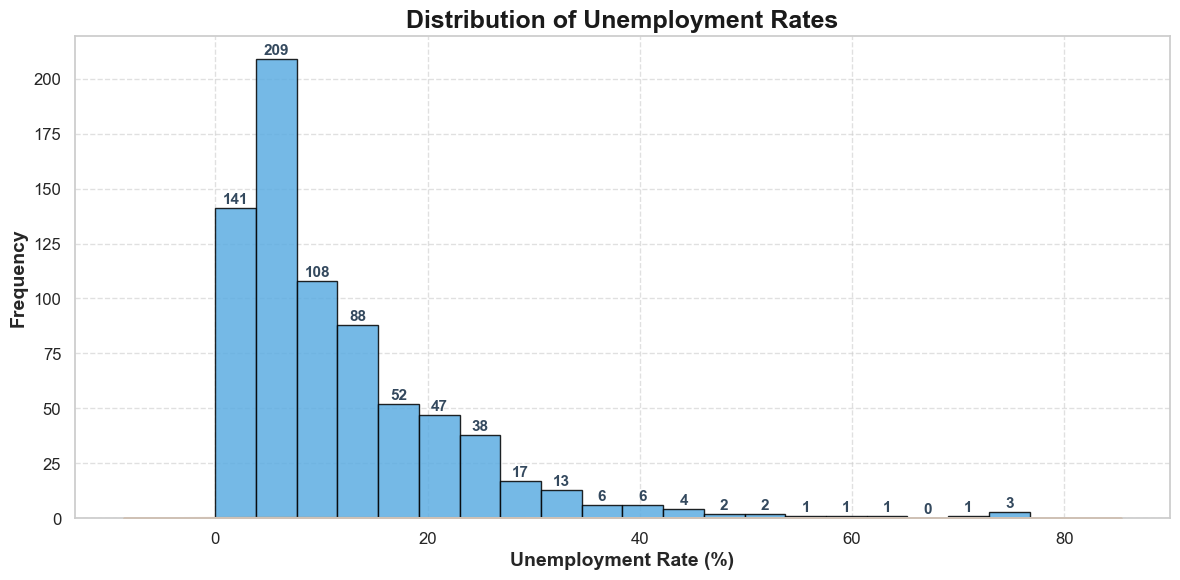

In [33]:
# --- Explication de cette cellule ---
# Enhanced Histogram for Unemployment Rate Distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Use a modern color palette and add edge color for clarity
n, bins, patches = plt.hist(
    data['estimated unemployment rate (%)'],
    bins=20,
    color='#5dade2',
    alpha=0.85,
    edgecolor='black'
 )

# Add value annotations on top of each bar
for i in range(len(patches)):
    plt.text(
        (bins[i] + bins[i+1]) / 2,
        n[i] + 2,
        f'{int(n[i])}',
        ha='center',
        fontsize=11,
        fontweight='bold',
        color='#34495e'
    )

# Add KDE curve for smoothness
sns.kdeplot(
    data['estimated unemployment rate (%)'],
    color='#e67e22',
    linewidth=2.5,
    fill=True,
    alpha=0.2
 )

plt.title('Distribution of Unemployment Rates', fontsize=18, fontweight='bold', color='#1a1a1a')
plt.xlabel('Unemployment Rate (%)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The distribution of unemployment rates is strongly right-skewed, indicating that most regions or periods experience relatively low unemployment, while only a few face very high rates.

As the unemployment rate increases, its frequency declines rapidly. The majority of observations fall within the 5-10% range (over 200 cases), whereas rates above 30% are rare, highlighting the exceptional nature of extremely high unemployment in the dataset.

In [34]:
# --- Explication de cette cellule ---
before_covid = data[data['date'] < '2020-03-01']
after_covid = data[data['date'] >= '2020-03-01']

In [35]:
# --- Explication de cette cellule ---
avg_before = before_covid['estimated unemployment rate (%)'].mean()
avg_after = after_covid['estimated unemployment rate (%)'].mean()

covid_compare = pd.DataFrame({
    'Period': ['Before COVID', 'After COVID'],
    'Average Unemployment Rate': [avg_before, avg_after]
})

C:\Users\Bilal\AppData\Local\Temp\ipykernel_35872\2183776775.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


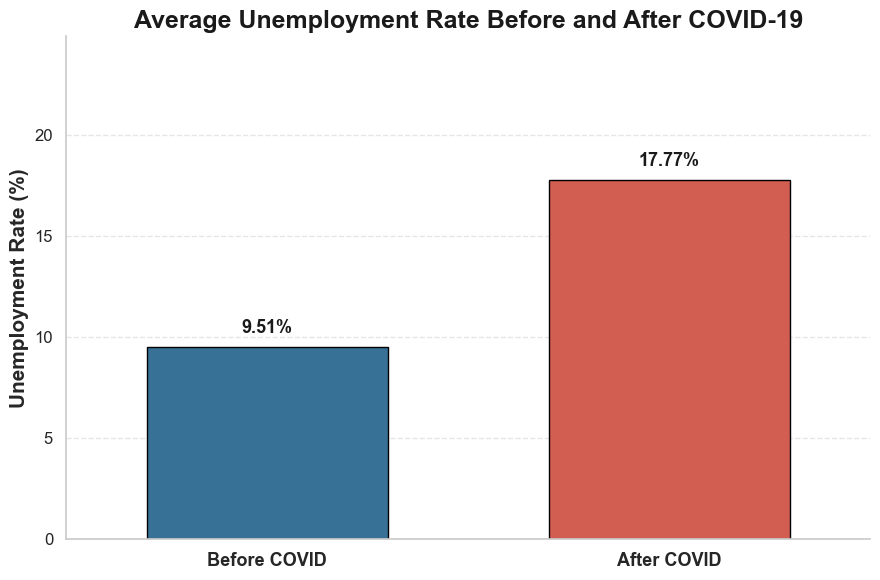

In [36]:
# --- Explication de cette cellule ---
# Enhanced Barplot: Average Unemployment Rate Before and After COVID-19
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
bars = sns.barplot(
    data=covid_compare,
    x='Period',
    y='Average Unemployment Rate',
    palette=['#2874a6', '#e74c3c'],
    edgecolor='black',
    width=0.6
 )

# Add value annotations on each bar
for bar in bars.patches:
    bars.annotate(
        f'{bar.get_height():.2f}%',
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5),
        ha='center', va='bottom', fontsize=13, fontweight='bold', color='#1a1a1a'
    )

plt.title('Average Unemployment Rate Before and After COVID-19', fontsize=18, fontweight='bold', color='#1a1a1a')
plt.ylabel('Unemployment Rate (%)', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylim(0, max(avg_before, avg_after)*1.4)
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

The analysis reveals a marked rise in the average unemployment rate following the onset of COVID-19.

After the pandemic began, the unemployment rate almost doubled compared to the pre-pandemic period, highlighting the substantial adverse economic effects brought about by COVID-19.

Unemployment Analysis in India - covid 19 pandamic

In [37]:
# --- Explication de cette cellule ---
import pandas as pd

# Replace 'file_path.csv' with the actual path to your dataset
data2 = pd.read_csv('C:\\Users\\Bilal\\Desktop\\CodeAlphaProjects\\CodeAlpha_UnemploymentAnalysiswithPython\\Unemployment_Rate_upto_11_2020.csv')

# Preview the first few rows
data2.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [38]:
# --- Explication de cette cellule ---
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [39]:
# --- Explication de cette cellule ---
# Check the number of columns before renaming
print('Number of columns in data2:', len(data2.columns))
print('Current columns:', data2.columns.tolist())

data2.columns=['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']

Number of columns in data2: 9
Current columns: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


In [40]:
# --- Explication de cette cellule ---
# Supprime les espaces et uniformise les noms
data2.columns = data2.columns.str.strip()

In [41]:
# --- Explication de cette cellule ---
data2.shape

(267, 9)

In [42]:
# --- Explication de cette cellule ---
data2.describe()

,estimated unemployment rate,estimated employed,estimated labour participation rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [43]:
# --- Explication de cette cellule ---
data2.isnull().sum()

state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
region                                 0
longitude                              0
latitude                               0
dtype: int64

In [44]:
# --- Explication de cette cellule ---
data2.region.value_counts()

region
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64

In [45]:
# --- Explication de cette cellule ---
# Convert 'date' column to datetime if not already
data2['date'] = pd.to_datetime(data2['date'], errors='coerce')

# Now extract the month as integer
data2['month_number'] = data2['date'].dt.month

data2.head()

C:\Users\Bilal\AppData\Local\Temp\ipykernel_35872\2477043261.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data2['date'] = pd.to_datetime(data2['date'], errors='coerce')


,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_number
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


In [46]:
# --- Explication de cette cellule ---
import calendar

# The months are in integer datatype. We need to convert the months into words for better analysis
data2['month'] = data2['month_number'].apply(lambda x: calendar.month_abbr[x] if pd.notnull(x) and x > 0 else "")
data2.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_number,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [47]:
# --- Explication de cette cellule ---
data2.columns

Index(['state', 'date', 'frequency', 'estimated unemployment rate',
       'estimated employed', 'estimated labour participation rate', 'region',
       'longitude', 'latitude', 'month_number', 'month'],
      dtype='object')

In [48]:
# --- Explication de cette cellule ---
# Print columns for debugging if needed
print('data2 columns:', data2.columns.tolist())

data2 columns: ['state', 'date', 'frequency', 'estimated unemployment rate', 'estimated employed', 'estimated labour participation rate', 'region', 'longitude', 'latitude', 'month_number', 'month']


In [49]:
# --- Explication de cette cellule ---
# Extracting month from date attribute
data2['month_number']=data2['date'].dt.month
data2

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_number,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740,5,May
...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,Sep


In [50]:
# --- Explication de cette cellule ---
# Numeric data grouped by months
data22=data2.groupby(['month'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
data22=pd.DataFrame(data22).reset_index()

In [51]:
# --- Explication de cette cellule ---
data22

,month,estimated unemployment rate,estimated employed,estimated labour participation rate
0,Apr,22.236154,1.057020e+07,35.297308
1,Aug,10.313333,1.442904e+07,42.390741
2,Feb,9.266154,1.548827e+07,44.180769
3,Jan,9.196538,1.563720e+07,44.626538
4,Jul,9.834444,1.441802e+07,42.274815
5,Jun,10.911111,1.385739e+07,41.203333
6,Mar,10.782593,1.453866e+07,43.746667
7,May,23.244444,1.150739e+07,39.647778
8,Oct,8.026296,1.457998e+07,41.438519
9,Sep,8.705926,1.458784e+07,41.974444


In [52]:
# --- Explication de cette cellule ---
# Bar plot of umemployment rate and labour participation rate
month=data22.month
unemployment_rate=data22['estimated unemployment rate']
labour_participation_rate=data22['estimated labour participation rate']

fig=go.Figure()

fig.add_trace(go.Bar(x=month,y=unemployment_rate,name='Unemployment Rate'))
fig.add_trace(go.Bar(x=month,y=labour_participation_rate,name='Labour Participation Rate'))

fig.update_layout(title='Unemployment Rate and Labour Participation Rate',xaxis={'categoryorder':'array','categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']})
fig.show()

In [53]:
# --- Explication de cette cellule ---
import plotly.express as px
fig=px.bar(data22,x='month',y='estimated employed',color='month',category_orders={'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']},title='Estimated employed people from Jan 2020 to Oct 2020')
fig.show()

In [54]:
# --- Explication de cette cellule ---
fig = px.bar(data2,x='state',y='estimated unemployment rate',animation_frame='month',color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020(StateWise)')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

From this graph, we can observe each state’s unemployment rate on a monthly basis.

In [55]:
# --- Explication de cette cellule ---
fig=px.scatter_geo(data2,'longitude','latitude',color='state',
                  hover_name='state',size='estimated unemployment rate',
                  animation_frame='month',scope='asia',title='Impact of lockdown on employment in India')

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =2000
fig.update_geos(lataxis_range=[5,40],lonaxis_range=[65,100],oceancolor='lightblue',
               showocean=True)

fig.show()

In [56]:
# --- Explication de cette cellule ---
data2.region.unique()


array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [57]:
# --- Explication de cette cellule ---
# numeric data grouped by region

region = data2.groupby(['region'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
region = pd.DataFrame(region).reset_index()

In [58]:
# --- Explication de cette cellule ---
# Average Unemployment Rate

fig = px.bar(region,x='region',y='estimated unemployment rate',color='region',title='Average unemployment rate(regionwise)')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [59]:
# --- Explication de cette cellule ---
unemployment =data2.groupby(['region','state'])['estimated unemployment rate'].mean().reset_index()
unemployment.head()

,region,state,estimated unemployment rate
0,East,Bihar,19.471
1,East,Jharkhand,19.539
2,East,Odisha,6.462
3,East,West Bengal,10.192
4,North,Delhi,18.414


In [60]:
# --- Explication de cette cellule ---
fig = px.sunburst(unemployment,path=['region','state'],values='estimated unemployment rate',
                 title ='Unemployment rate in state and region',height=600)
fig.show()

In [61]:
# --- Explication de cette cellule ---
# data representation before and after lockdown

before_lockdown = data2[(data2['month_number']>=1) &(data2['month_number'] <4)]
after_lockdown = data2[(data2['month_number'] >=4) & (data2['month_number'] <=6)]

In [62]:
# --- Explication de cette cellule ---
af_lockdown = after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()

lockdown = before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns = ['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


In [63]:
# --- Explication de cette cellule ---
# unenployment rate change after lockdown

lockdown['rate change in unemployment'] =round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                              /lockdown['unemployment rate after lockdown'],2)
fig = px.bar(lockdown,x='state',y='rate change in unemployment',color='rate change in unemployment',
            title='Percentage change in Unemployment rate in each state after the lockdown',template='ggplot2')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()